In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
#Loading Dataset
df = pd.read_excel('data.xlsx')
df.head(5)

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
#print the shape of the dataset
df.shape

(3998, 39)

In [4]:
#Check general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
#Check column names
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
#Checking for missing values
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [7]:
#Preprocess the dataset (Fixing the column names)
cols= {'UID': 'CandidateID','DOJ': 'DateOfJoining','DOL': 'DateOfLeaving','Designation': 'JobDesignation',
    'DOB': 'DateOfBirth','10percentage': 'Grade10Percentage','10board': 'Grade10Board',
    '12graduation': 'Grade12GraduationYear','12percentage': 'Grade12Percentage','12board': 'Grade12Board'}

df.rename(columns=cols, inplace=True)

In [8]:
#set the present value in the Leaving date column to today's date and store in a variable.
present_date = dt.today()
print(present_date)

2024-10-04 10:12:12.723945


### Feature Engineering

In [9]:
# Calculating employment duration

#replace 'present' column with today's date
df['DateOfLeaving'] = df['DateOfLeaving'].replace('present', present_date)
df['DateOfLeaving'] = pd.to_datetime(df['DateOfLeaving'])
df['DateOfLeaving'] = df['DateOfLeaving']

# Calculate employment duration in years (rounded)
df['EmploymentDurationYears'] = round((df['DateOfLeaving'] - df['DateOfJoining']).dt.days / 365)

C:\Users\Aify\AppData\Local\Temp\ipykernel_6740\3946360672.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DateOfLeaving'] = df['DateOfLeaving'].replace('present', present_date)


In [10]:
# Create working status column
df['EmploymentStatus'] = df['DateOfLeaving'].apply(lambda x: 'Currently Employed' if x==present_date else 'Left')

# Dropping the first unna
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
#Creating the Age Column
df['Age'] = present_date.year - df['DateOfBirth'].dt.year

In [12]:
#Check to see if the transformation has ben effected
df.head(2)

ID  Salary DateOfJoining              DateOfLeaving  \
0  203097  420000    2012-06-01 2024-10-04 10:12:12.723945   
1  579905  500000    2013-09-01 2024-10-04 10:12:12.723945   

            JobDesignation    JobCity Gender DateOfBirth  Grade10Percentage  \
0  senior quality engineer  Bangalore      f  1990-02-19               84.3   
1        assistant manager     Indore      m  1989-10-04               85.4   

                     Grade10Board  ...  TelecomEngg  CivilEngg  \
0  board ofsecondary education,ap  ...           -1         -1   
1                            cbse  ...           -1         -1   

  conscientiousness  agreeableness  extraversion nueroticism  \
0            0.9737         0.8128        0.5269      1.3549   
1           -0.7335         0.3789        1.2396     -0.1076   

  openess_to_experience  EmploymentDurationYears    EmploymentStatus  Age  
0               -0.4455                     12.0  Currently Employed   34  
1                0.8637                     11.0  Currently Employed   35  

[2 rows x 41 columns]

# Exploratory Data Analysis

#### General Non visual EDA

In [13]:
# Full description of the numerical columns

def numerical_summary_stats(df):
    # Select only numerical columns (excluding datetime and object columns)
    numerical_cols = df.select_dtypes(include=['number'])
    
    # Summary statistics
    numerical_summary = numerical_cols.describe().T
    
    # Adding kurtosis and skewness
    numerical_summary['median'] = numerical_cols.median()  # Median
    numerical_summary['kurtosis'] = numerical_cols.kurt()  # Kurtosis
    numerical_summary['skewness'] = numerical_cols.skew()  # Skewness

    return numerical_summary

description = numerical_summary_stats(df)
description

count           mean            std         min  \
ID                       3998.0  663794.540520  363218.245829  11244.0000   
Salary                   3998.0  307699.849925  212737.499957  35000.0000   
Grade10Percentage        3998.0      77.925443       9.850162     43.0000   
Grade12GraduationYear    3998.0    2008.087544       1.653599   1995.0000   
Grade12Percentage        3998.0      74.466366      10.999933     40.0000   
CollegeID                3998.0    5156.851426    4802.261482      2.0000   
CollegeTier              3998.0       1.925713       0.262270      1.0000   
collegeGPA               3998.0      71.486171       8.167338      6.4500   
CollegeCityID            3998.0    5156.851426    4802.261482      2.0000   
CollegeCityTier          3998.0       0.300400       0.458489      0.0000   
GraduationYear           3998.0    2012.105803      31.857271      0.0000   
English                  3998.0     501.649075     104.940021    180.0000   
Logical                  3998.0     501.598799      86.783297    195.0000   
Quant                    3998.0     513.378189     122.302332    120.0000   
Domain                   3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming      3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon    3998.0      95.328414     158.241218     -1.0000   
ComputerScience          3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg           3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg           3998.0      16.478739      87.585634     -1.0000   
TelecomEngg              3998.0      31.851176     104.852845     -1.0000   
CivilEngg                3998.0       2.683842      36.658505     -1.0000   
conscientiousness        3998.0      -0.037831       1.028666     -4.1267   
agreeableness            3998.0       0.146496       0.941782     -5.7816   
extraversion             3998.0       0.002763       0.951471     -4.6009   
nueroticism              3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience    3998.0      -0.138110       1.008075     -7.3757   
EmploymentDurationYears  3998.0       5.835168       5.023198     -1.0000   
Age                      3998.0      33.572536       1.767473     27.0000   

                                   25%            50%            75%  \
ID                       334284.250000  639600.000000  990480.000000   
Salary                   180000.000000  300000.000000  370000.000000   
Grade10Percentage            71.680000      79.150000      85.670000   
Grade12GraduationYear      2007.000000    2008.000000    2009.000000   
Grade12Percentage            66.000000      74.400000      82.600000   
CollegeID                   494.000000    3879.000000    8818.000000   
CollegeTier                   2.000000       2.000000       2.000000   
collegeGPA                   66.407500      71.720000      76.327500   
CollegeCityID               494.000000    3879.000000    8818.000000   
CollegeCityTier               0.000000       0.000000       1.000000   
GraduationYear             2012.000000    2013.000000    2014.000000   
English                     425.000000     500.000000     570.000000   
Logical                     445.000000     505.000000     565.000000   
Quant                       430.000000     515.000000     595.000000   
Domain                        0.342315       0.622643       0.842248   
ComputerProgramming         295.000000     415.000000     495.000000   
ElectronicsAndSemicon        -1.000000      -1.000000     233.000000   
ComputerScience              -1.000000      -1.000000      -1.000000   
MechanicalEngg               -1.000000      -1.000000      -1.000000   
ElectricalEngg               -1.000000      -1.000000      -1.000000   
TelecomEngg                  -1.000000      -1.000000      -1.000000   
CivilEngg                    -1.000000      -1.000000      -1.000000   
conscientiousness            -0.713525       0.046400      

In [14]:
#Description of the categorical variables

def cat_summary_stats(df):
    #Selecting only the categorical columns
    cat_cols = df.select_dtypes(include=['object'])

    #Summary statistics
    categorical_summary = cat_cols.describe().T

    # Adding the unique categories for each column
    categorical_summary['categories'] = cat_cols.apply(lambda col: col.unique())

    return categorical_summary

cat_desc = cat_summary_stats(df)
cat_desc


count unique                                        top  \
JobDesignation    3998    419                          software engineer   
JobCity           3998    339                                  Bangalore   
Gender            3998      2                                          m   
Grade10Board      3998    275                                       cbse   
Grade12Board      3998    340                                       cbse   
Degree            3998      4                                B.Tech/B.E.   
Specialization    3998     46  electronics and communication engineering   
CollegeState      3998     26                              Uttar Pradesh   
EmploymentStatus  3998      2                                       Left   

                  freq                                         categories  
JobDesignation     539  [senior quality engineer, assistant manager, s...  
JobCity            627  [Bangalore, Indore, Chennai, Gurgaon, Manesar,...  
Gender            3041                                             [f, m]  
Grade10Board      1395  [board ofsecondary education,ap, cbse, state b...  
Grade12Board      1400  [board of intermediate education,ap, cbse, sta...  
Degree            3700    [B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)]  
Specialization     880  [computer engineering, electronics and communi...  
CollegeState       915  [Andhra Pradesh, Madhya Pradesh, Uttar Pradesh...  
EmploymentStatus  2123                         [Currently Employed, Left]

#### Since we have a target variable (Salary), most analysis (Univariate/Bivariate) would be done with respect to that variable.

## Univariate Analysis

### Non Visual Analysis

In [15]:
# Giving a standard description of the target variable

def summary_stats(series):
    # Get basic statistics using describe
    summary = series.describe()
    
    # Add kurtosis and skewness
    summary['median'] = series.median()
    summary['kurtosis'] = series.kurt()
    summary['skewness'] = series.skew()

    return summary

description = summary_stats(df['Salary'])
description

count       3.998000e+03
mean        3.076998e+05
std         2.127375e+05
min         3.500000e+04
25%         1.800000e+05
50%         3.000000e+05
75%         3.700000e+05
max         4.000000e+06
median      3.000000e+05
kurtosis    8.093000e+01
skewness    6.451081e+00
Name: Salary, dtype: float64

#### Findings
- With a mean salary of 307,700 INR but a median salary of 300,000 INR, we see that the average salary is slightly higher than the middle point, suggesting some salary inequality. However, when considering the maximum salary of 4,000,000 INR, it becomes clear that there are a few very highly-paid candidates that skew the average upwards.
- With a standard deviation of 212,738 INR, there is a wide range of salaries offered to candidates. This variation could be due to factors such as job role, experience, or specialization.
- The skewness of 6.45 indicates that most salaries cluster around the lower end of the scale, with a small number of extremely high salaries pulling the distribution right. The kurtosis of 80.93 also shows the presence of extreme outliers in the dataset.
- The 25th percentile salary is 180,000 INR, meaning 25% of employees earn less than this amount. The 75th percentile salary is 370,000 INR, meaning the majority of employees (50%) earn between 180,000 and 370,000 INR.
- The presence of salaries as high as 4,000,000 INR (significantly higher than the 75th percentile) suggests a few top earners in the company.

### Visual Analysis

#### Histogram and PDF

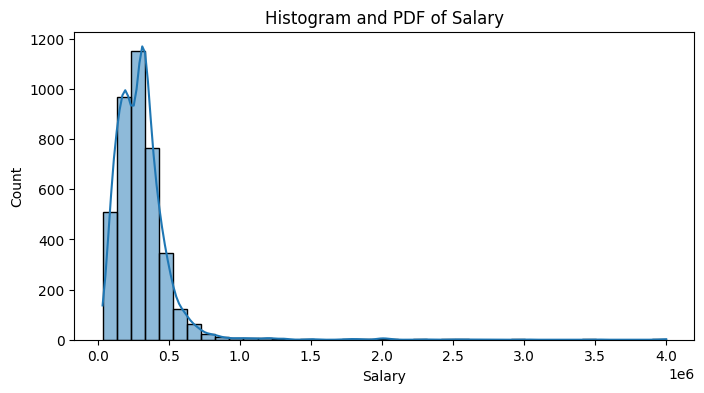

In [16]:
# Histogram and PDF for numerical columns
plt.figure(figsize=(8,4))
sns.histplot(df['Salary'],kde=True,bins=40)
plt.title(f'Histogram and PDF of Salary')
plt.show()

The histogram with the Probability Density Function (PDF) for salary shows a highly right-skewed distribution. Here are some key insights:

- Majority of the salaries: Most candidates earn salaries below 5,00,000 INR. The highest concentration of salaries lies between 1,50,000 INR and 5,00,000 INR, indicating this range as a common salary bracket.

- Outliers: There are a few very high salary values (up to 40,00,000 INR), but these are rare and far from the majority, causing the right tail of the distribution to extend significantly.

- Skewness: The salary distribution is heavily skewed to the right, which is confirmed by the sharp drop-off after 5,00,000 INR. This means that while some candidates earn very high salaries, the bulk of them earn in the lower range.

- Potential Disparities: The large number of people earning lower salaries and the presence of extreme high-salary outliers suggest a potential disparity in how salaries are distributed across candidates, which could be tied to factors like job specialization, location, or education background.

#### Box Plot

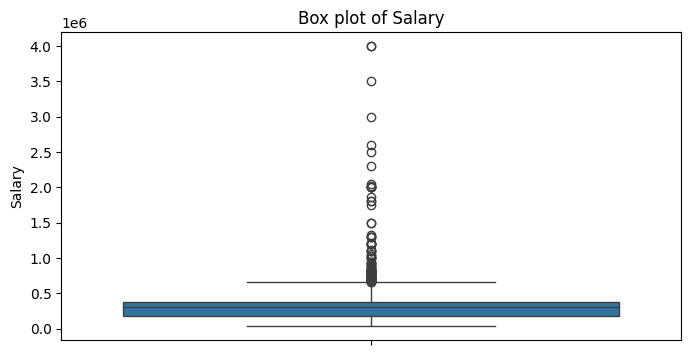

In [17]:
# Box plot for numnerical columns (outlier detection)
plt.figure(figsize=(8,4))
sns.boxplot(df['Salary'])
plt.title(f'Box plot of Salary')
plt.show()

The box plot of salaries provides the following insights:

- Concentration of Salaries: The bulk of the salaries (the interquartile range, or IQR) lies between approximately 150,000 INR and 370,000 INR. This indicates that most of the candidates earn within this range.

- Median Salary: The median salary (the line inside the box) is around 300,000 INR, which suggests that half of the candidates earn less than this amount and half earn more.

- Outliers: There are numerous outliers beyond the upper whisker, which represents the higher extreme of the "normal" salary range. These outliers go as high as 4,000,000 INR, showing that there are several candidates earning significantly higher salaries than the majority. These high salaries may be attributed to highly specialized roles or candidates with exceptional qualifications.

- Skewness Confirmation: The box plot also confirms a right-skewed distribution, as the upper whisker and the outliers are spread out far beyond the upper quartile, while the lower range is relatively compact.

## Bivariate Analysis

##### Salary column vs each categorical column

In [18]:
# Calculate mean and median salary by each categorical column
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nSummary statistics for {col}:\n")
    print(df.groupby(col)['Salary'].agg(['mean', 'median', 'count']))


Summary statistics for JobDesignation:

                                        mean    median  count
JobDesignation                                               
.net developer                 223382.352941  200000.0     34
.net web developer             196250.000000  210000.0      4
account executive              287500.000000  310000.0      4
account manager                350000.000000  350000.0      1
admin assistant                102500.000000  102500.0      2
...                                      ...       ...    ...
web designer and seo           200000.000000  200000.0      1
web developer                  168981.481481  147500.0     54
web intern                     205000.000000  205000.0      1
website developer/tester       200000.000000  200000.0      1
windows systems administrator  200000.000000  200000.0      1

[419 rows x 3 columns]

Summary statistics for JobCity:

                       mean    median  count
JobCity                                     
-1   

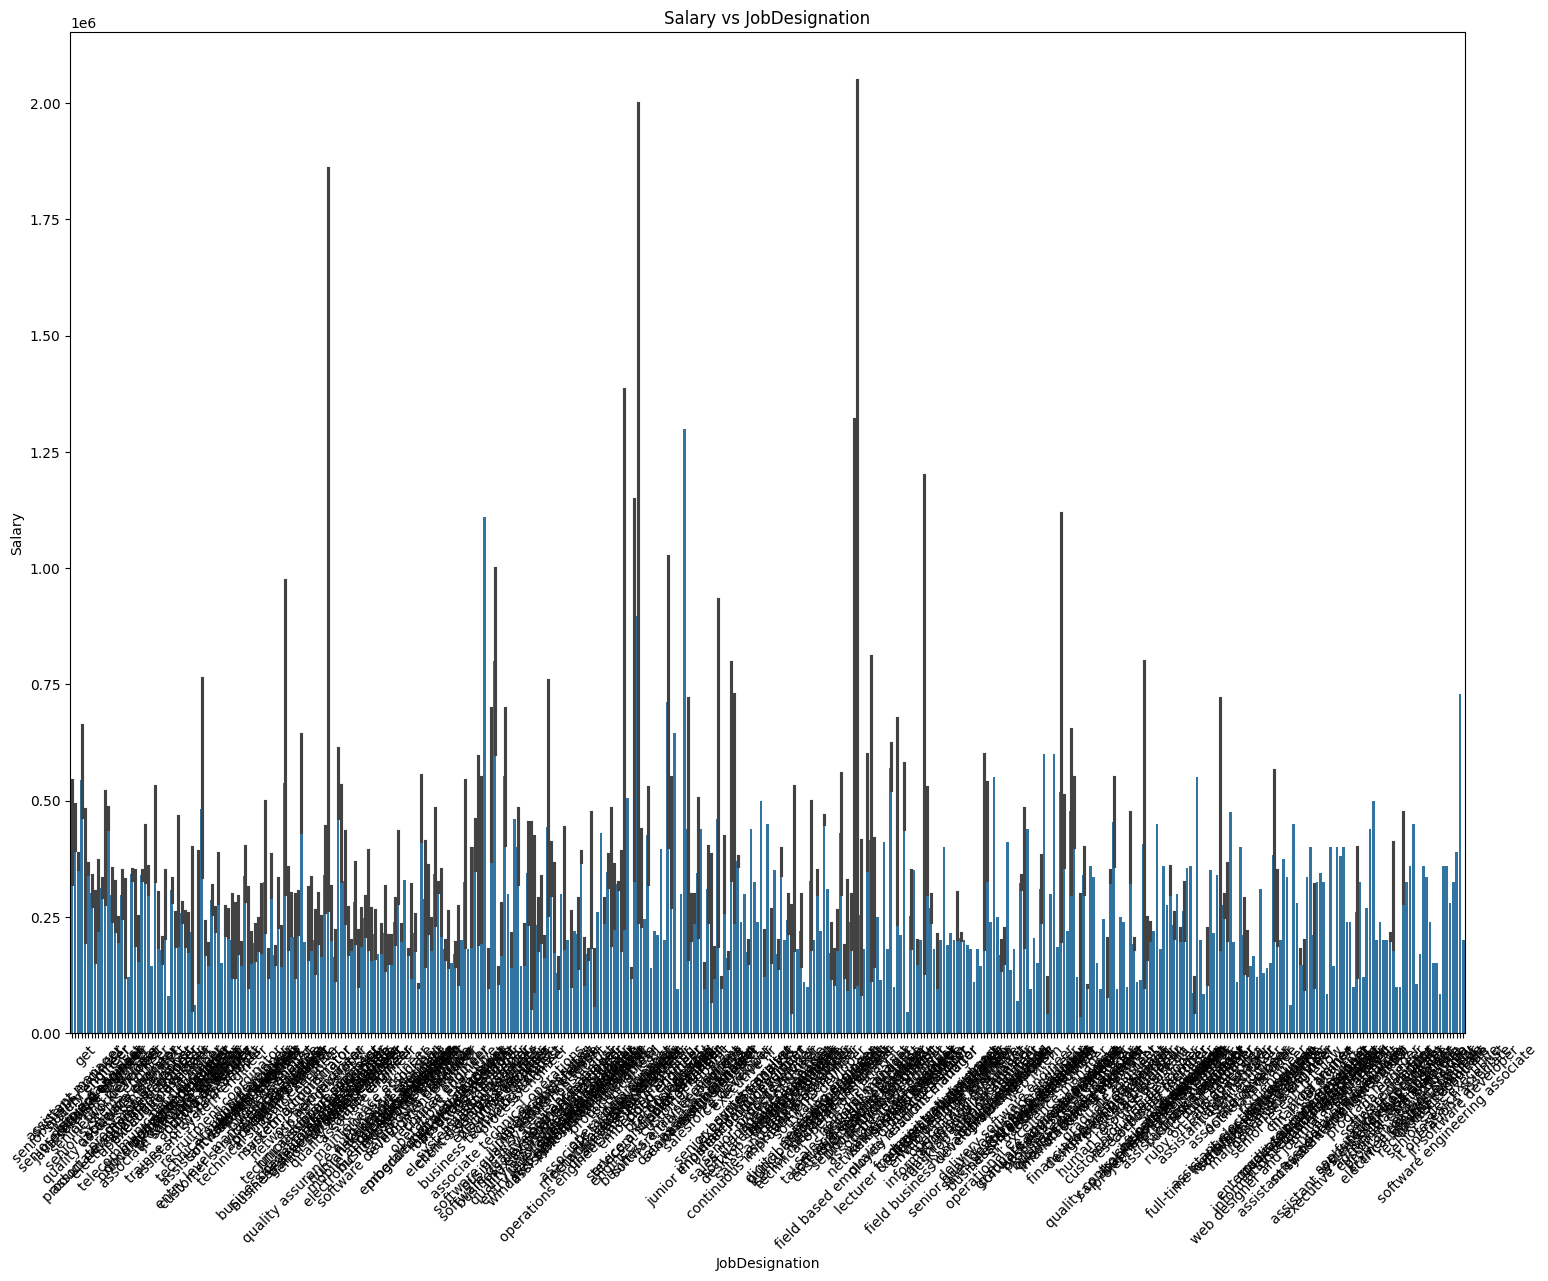

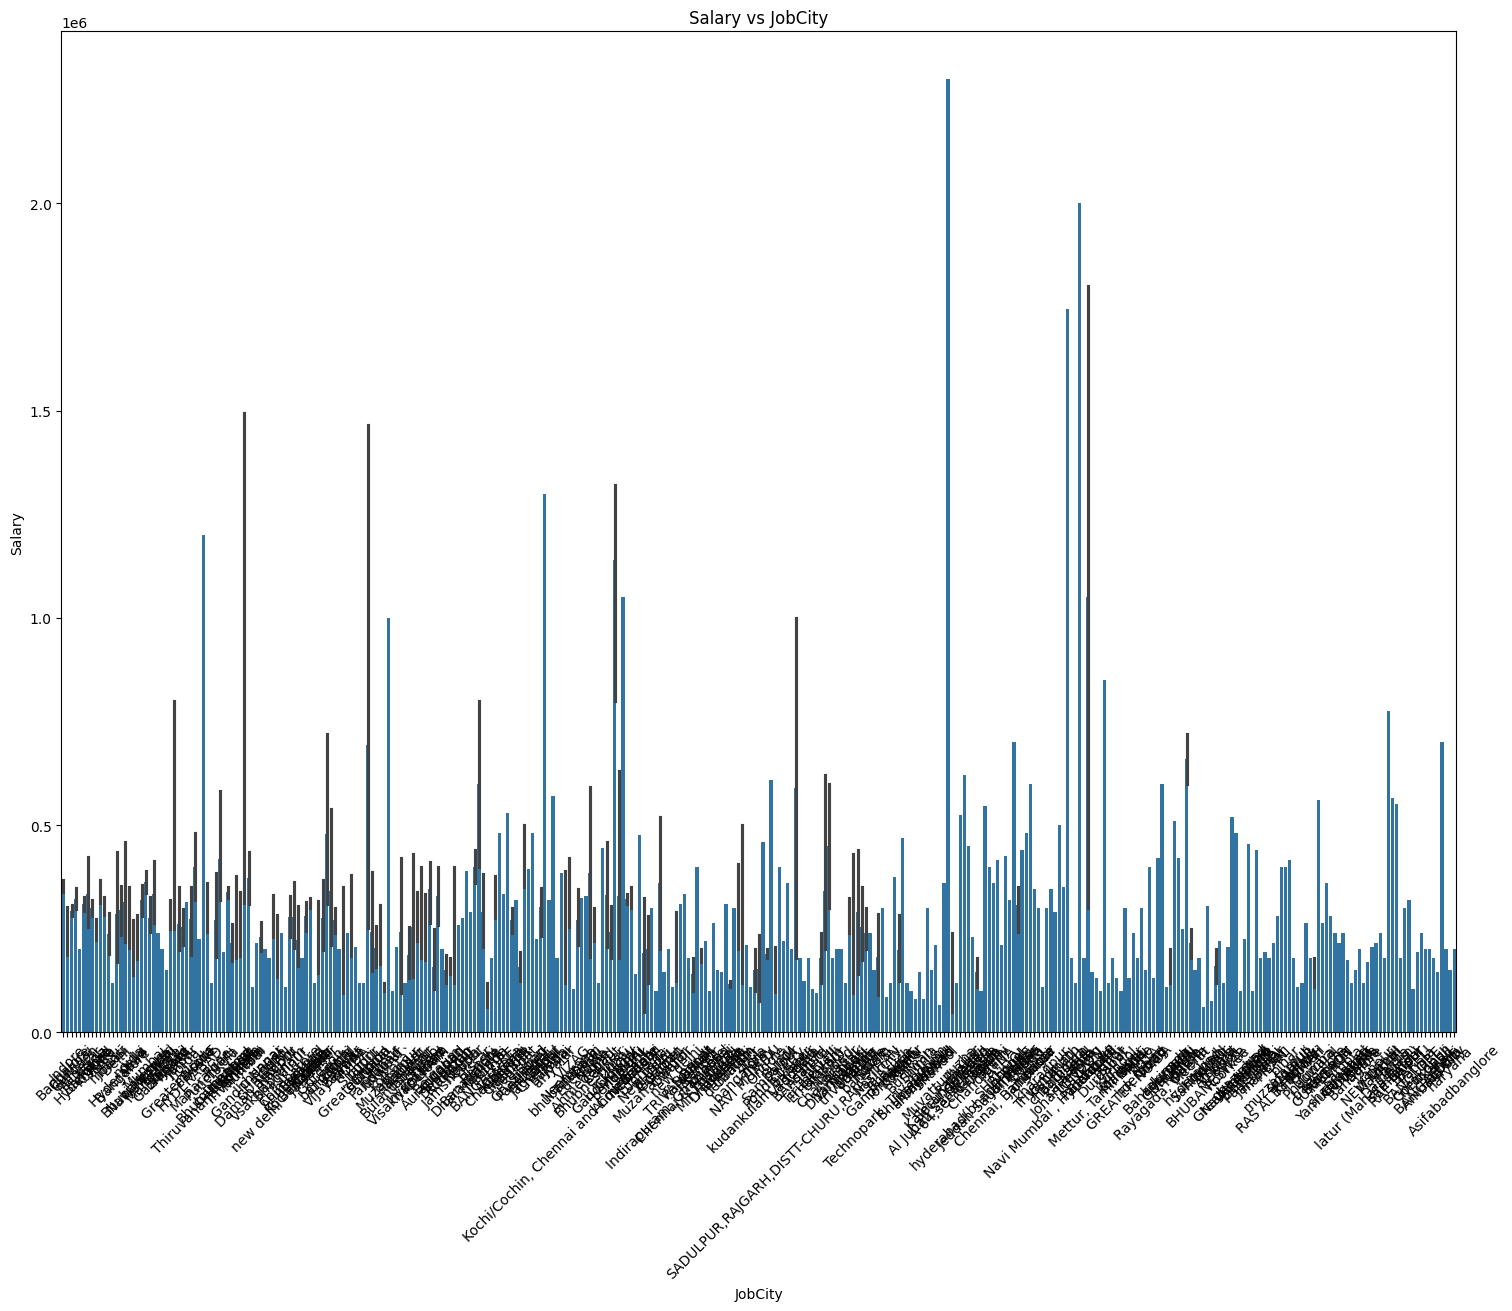

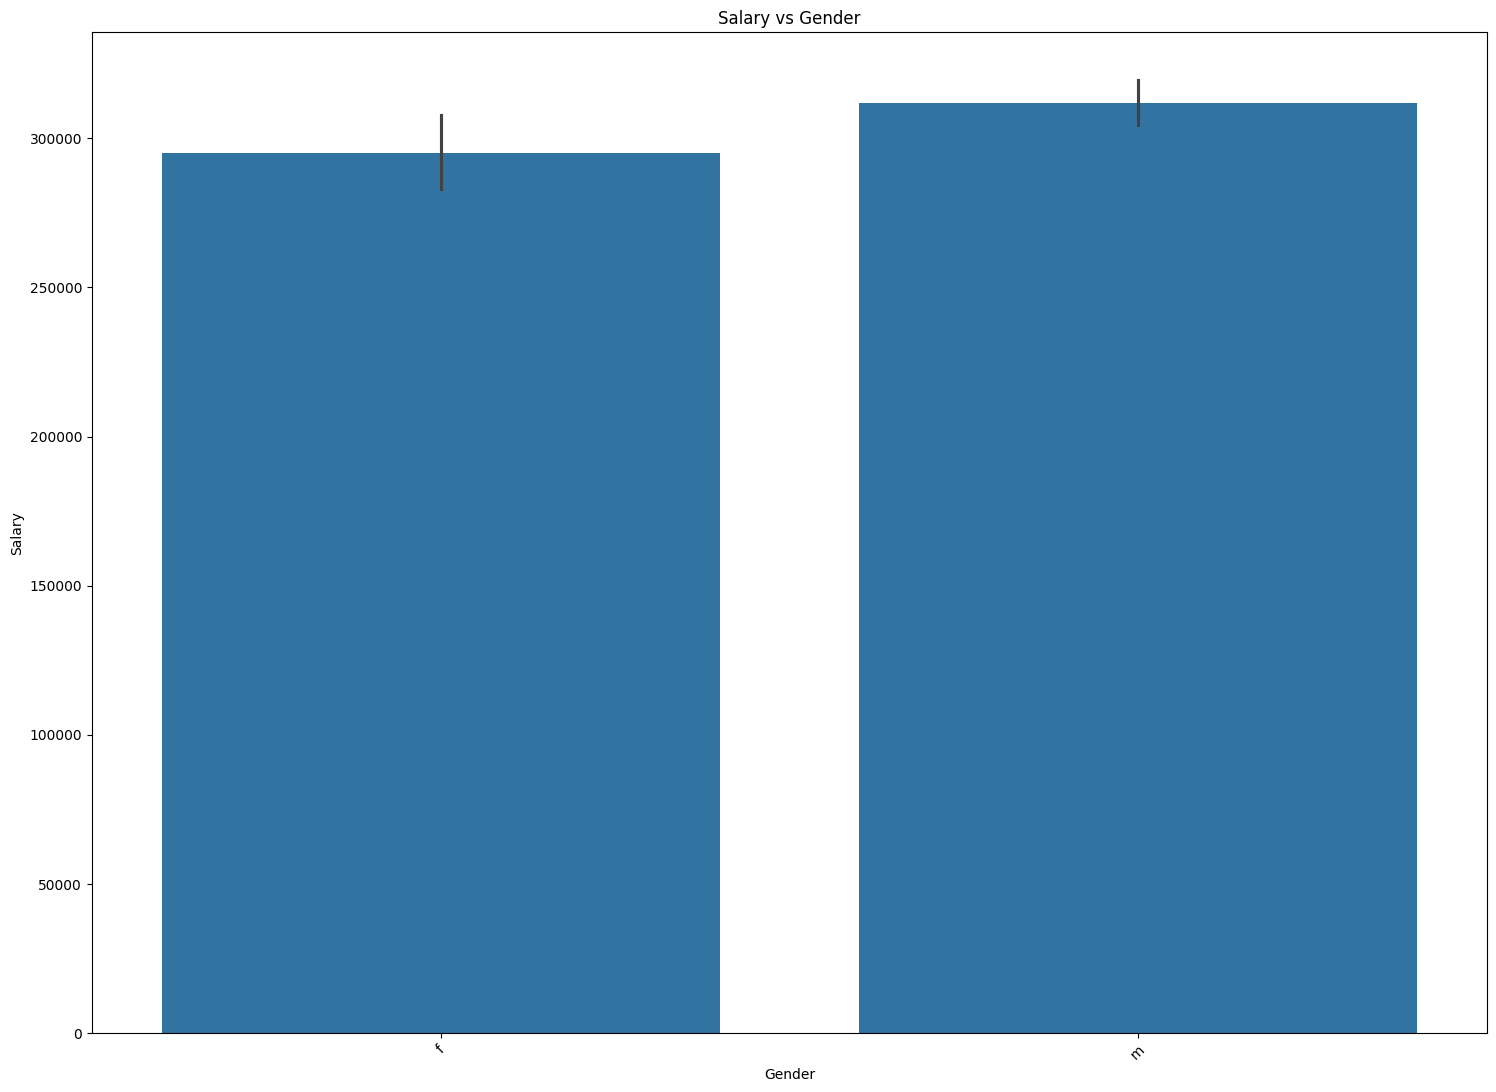

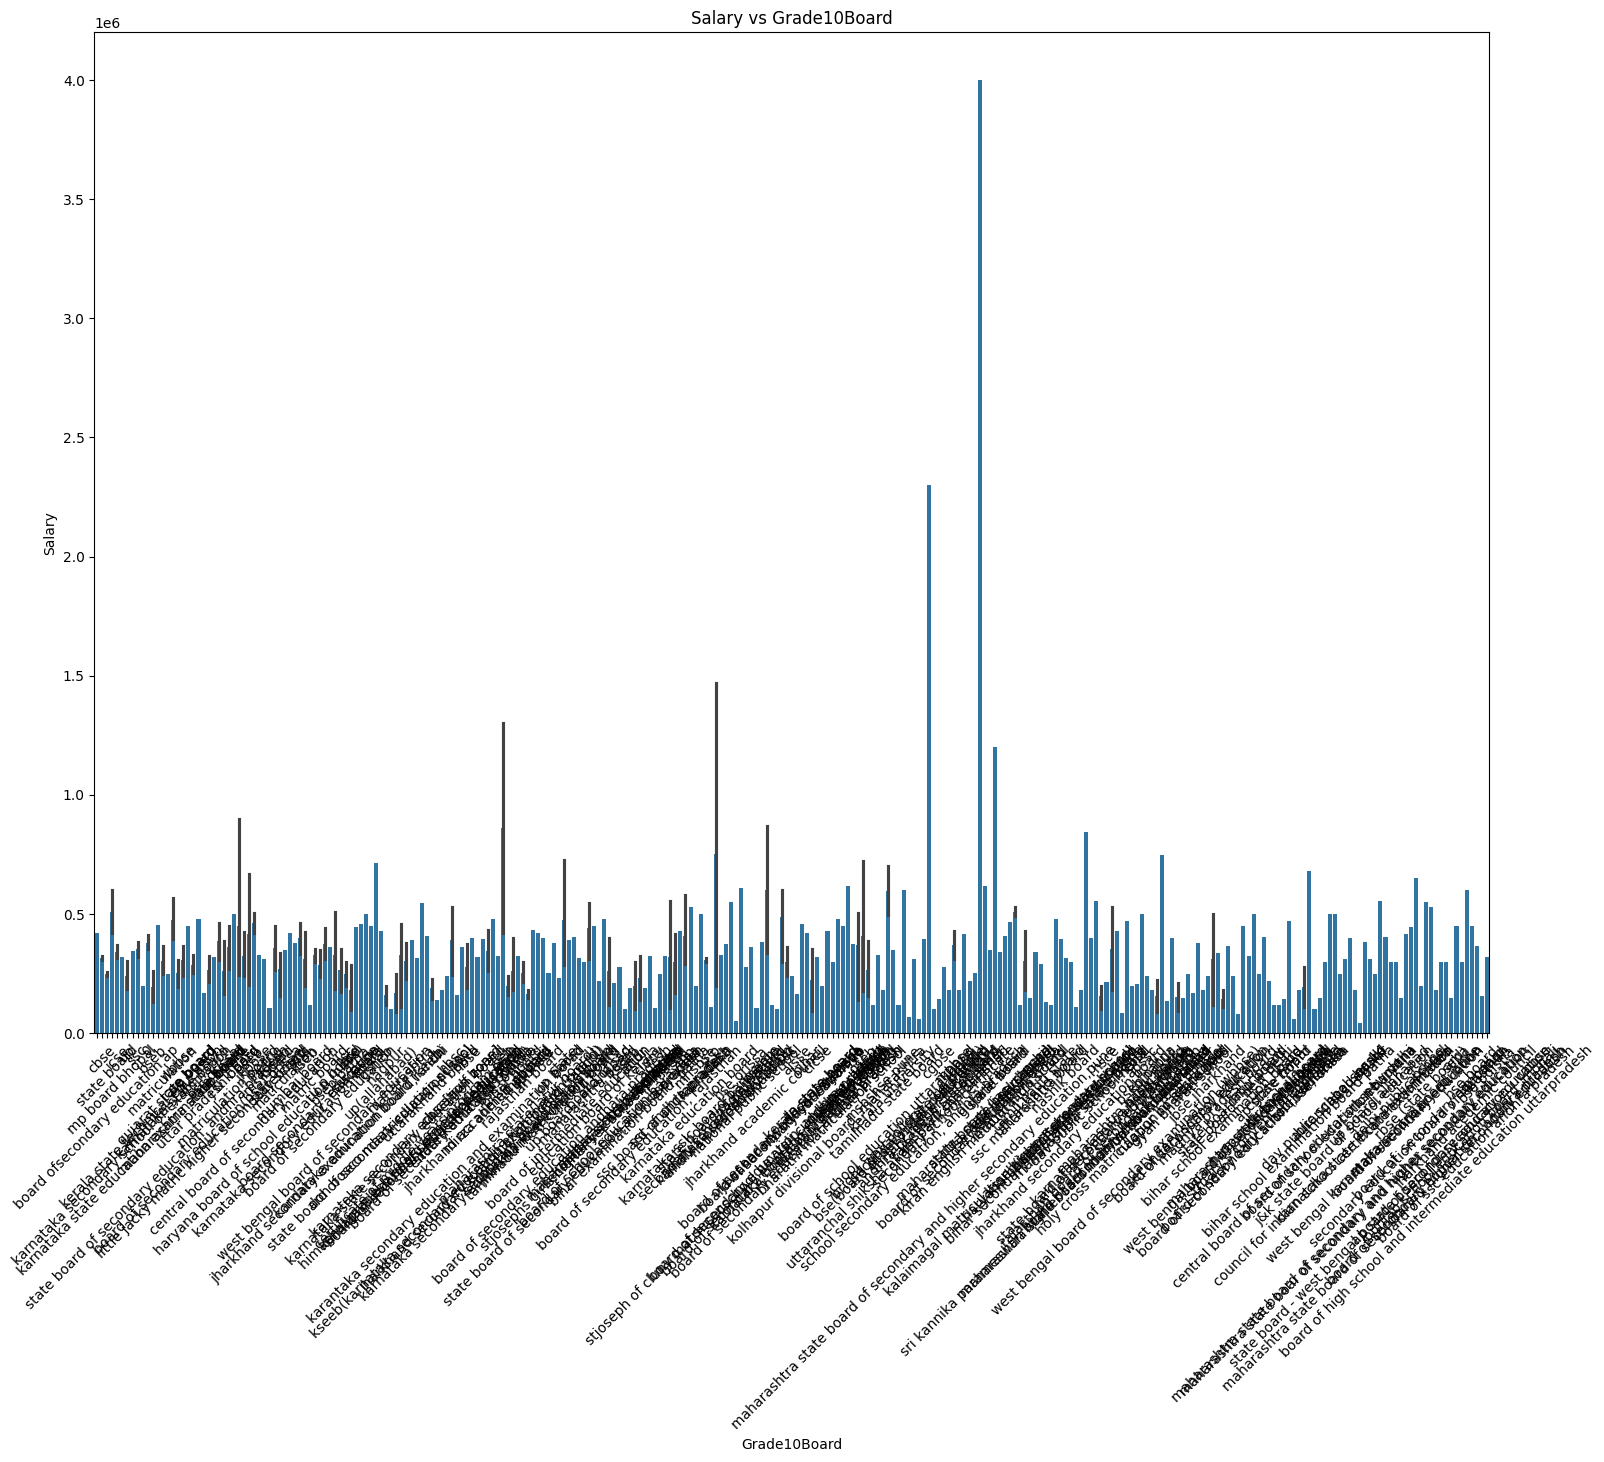

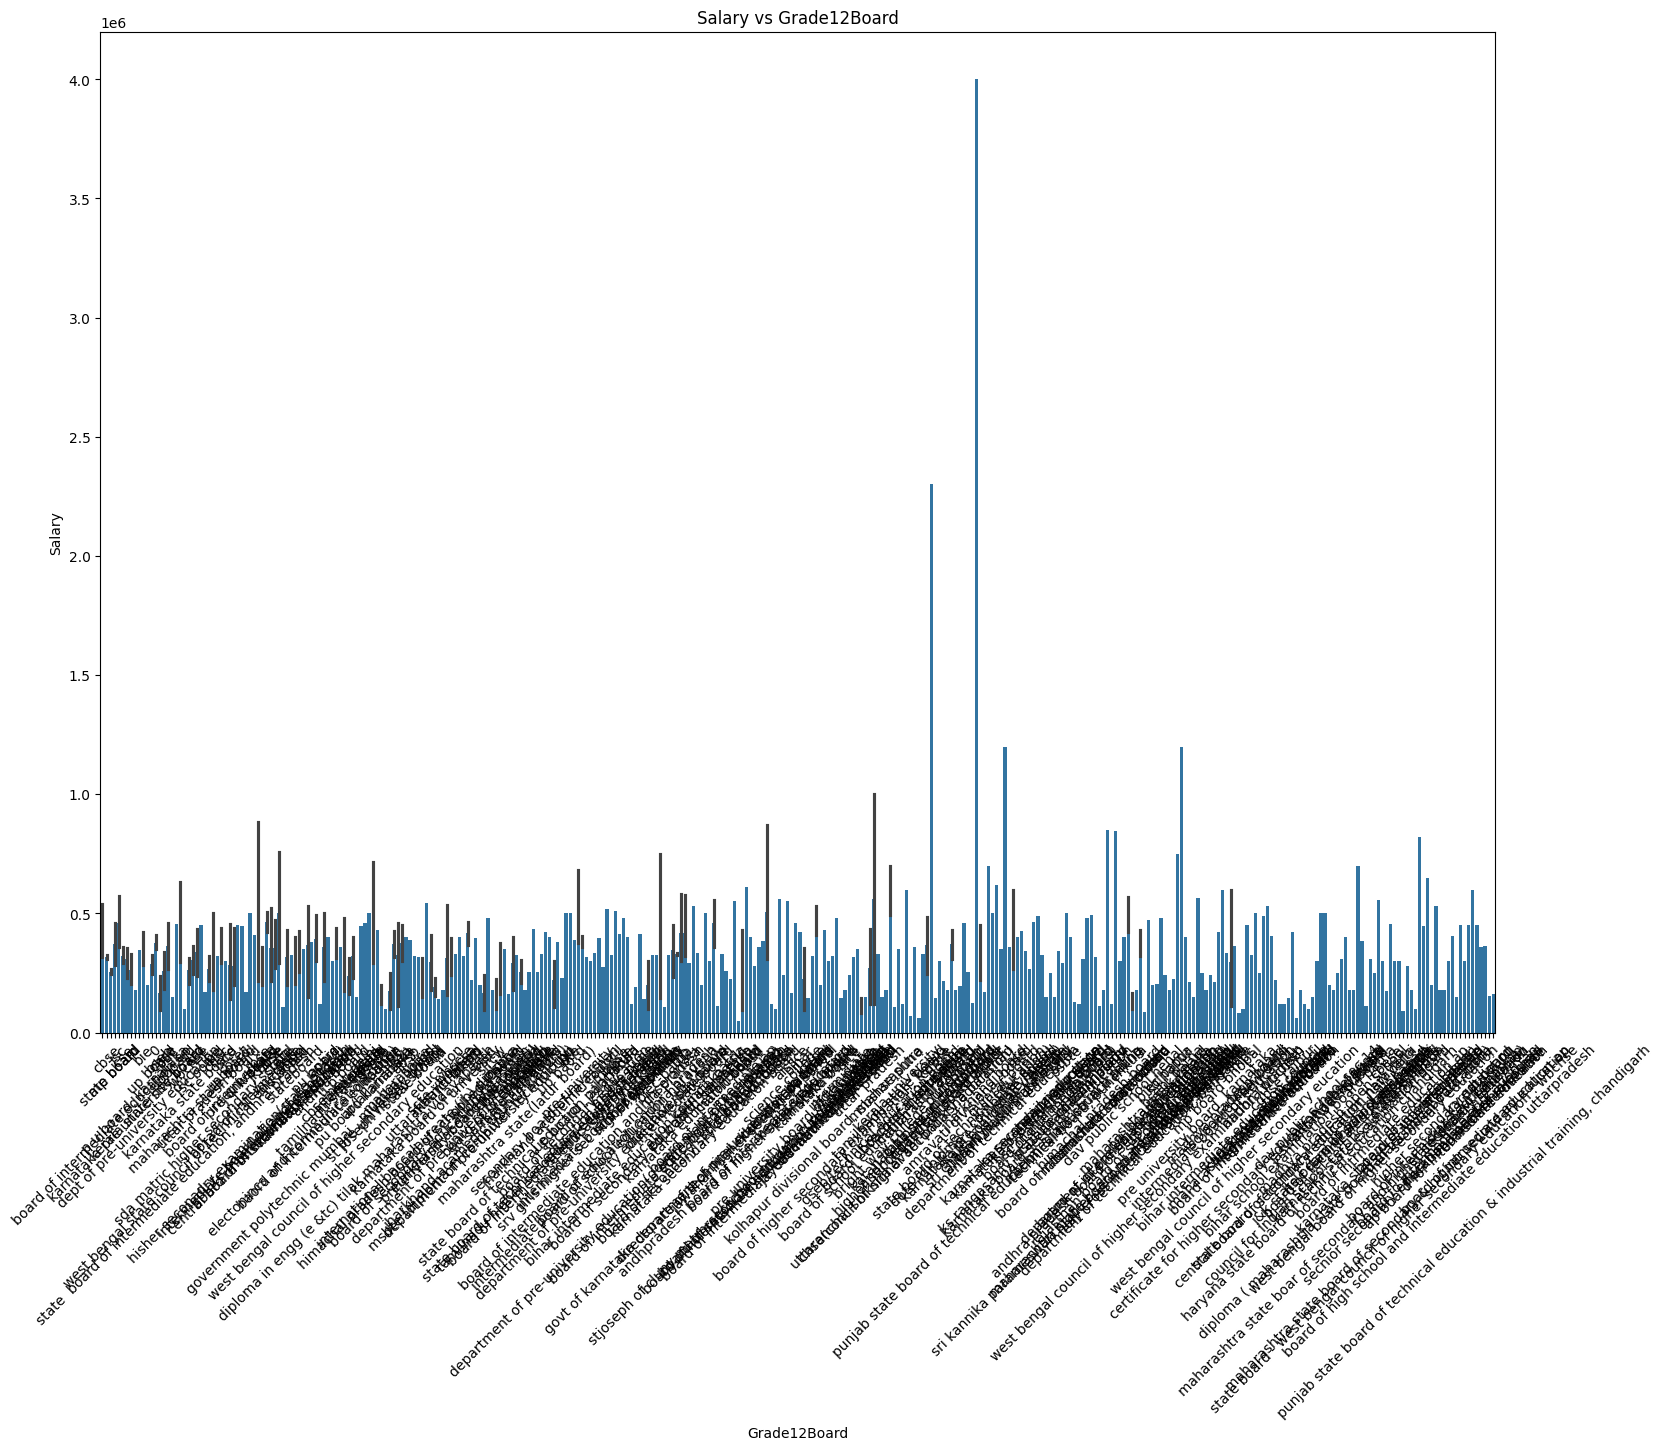

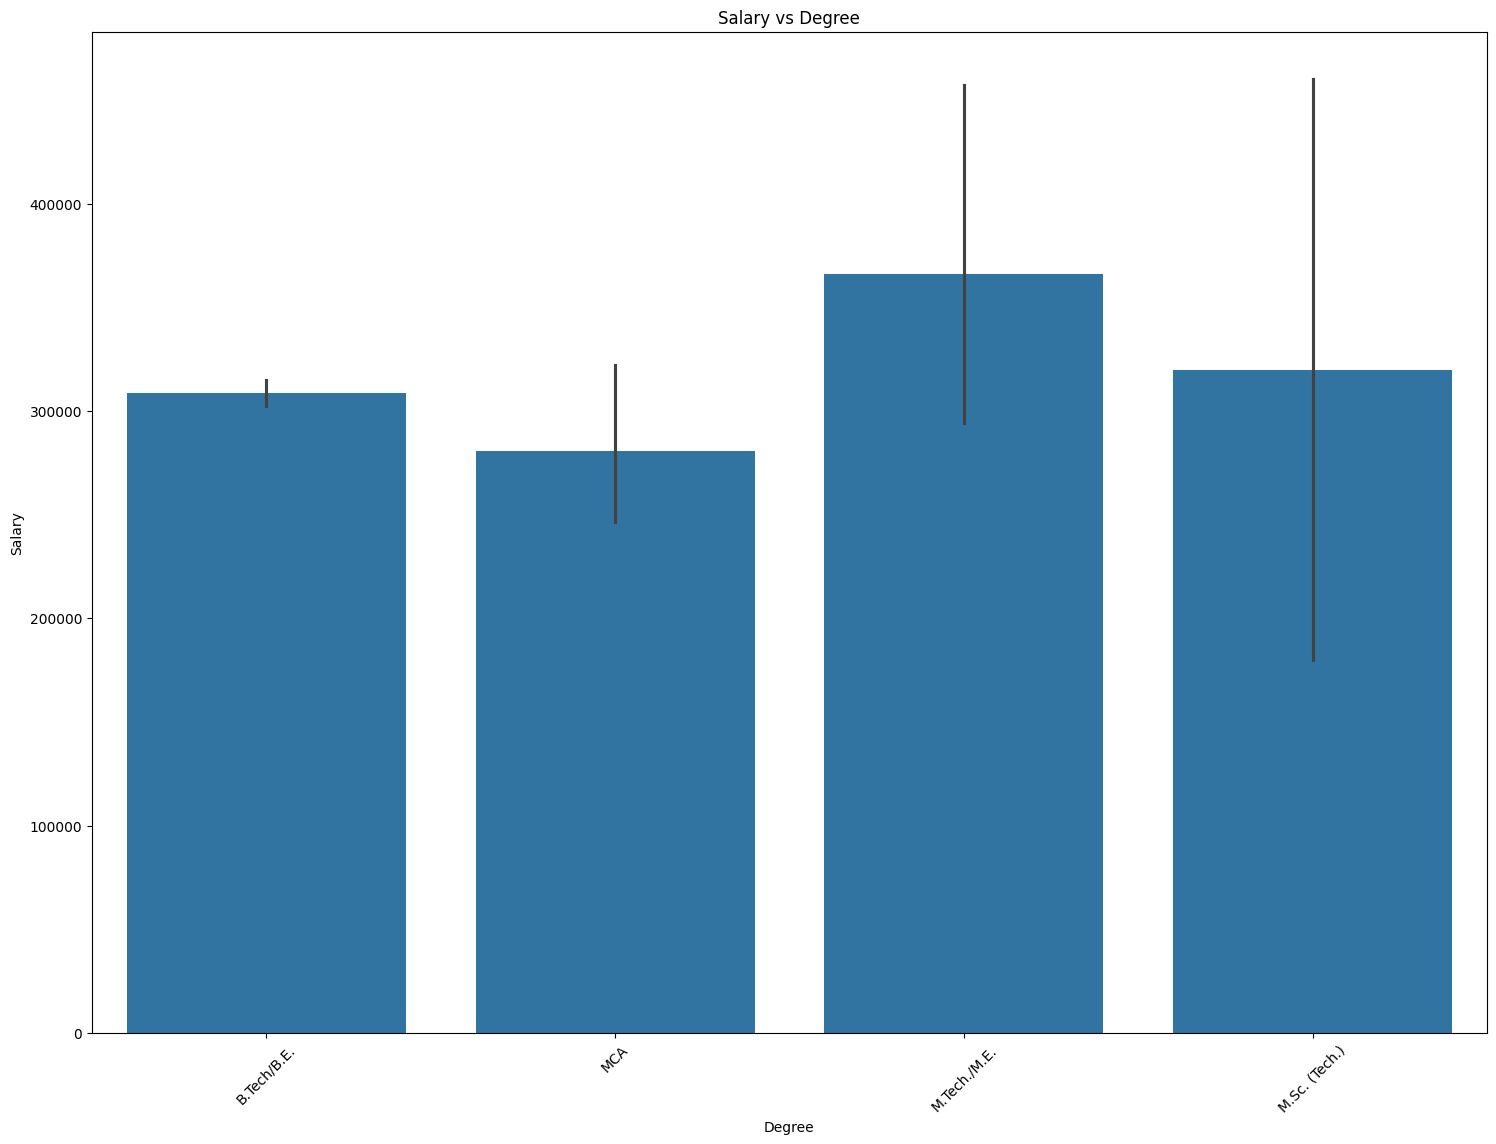

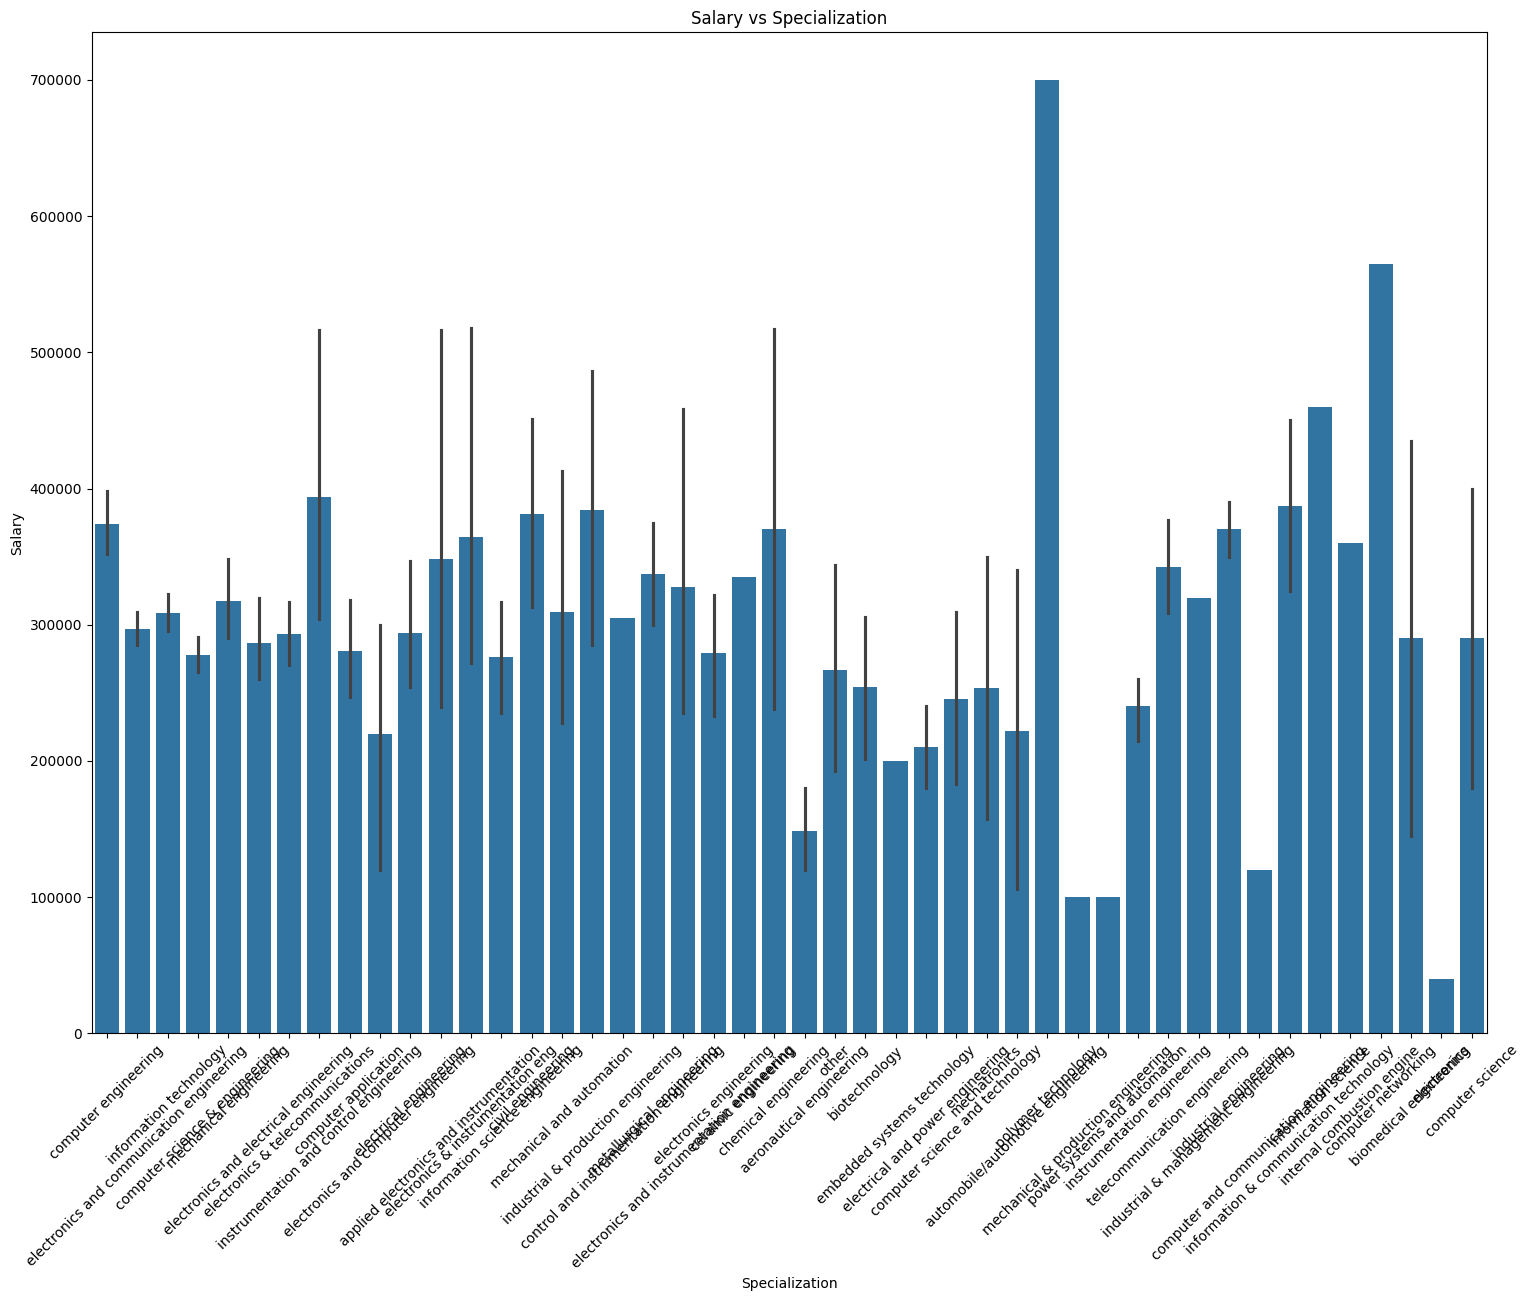

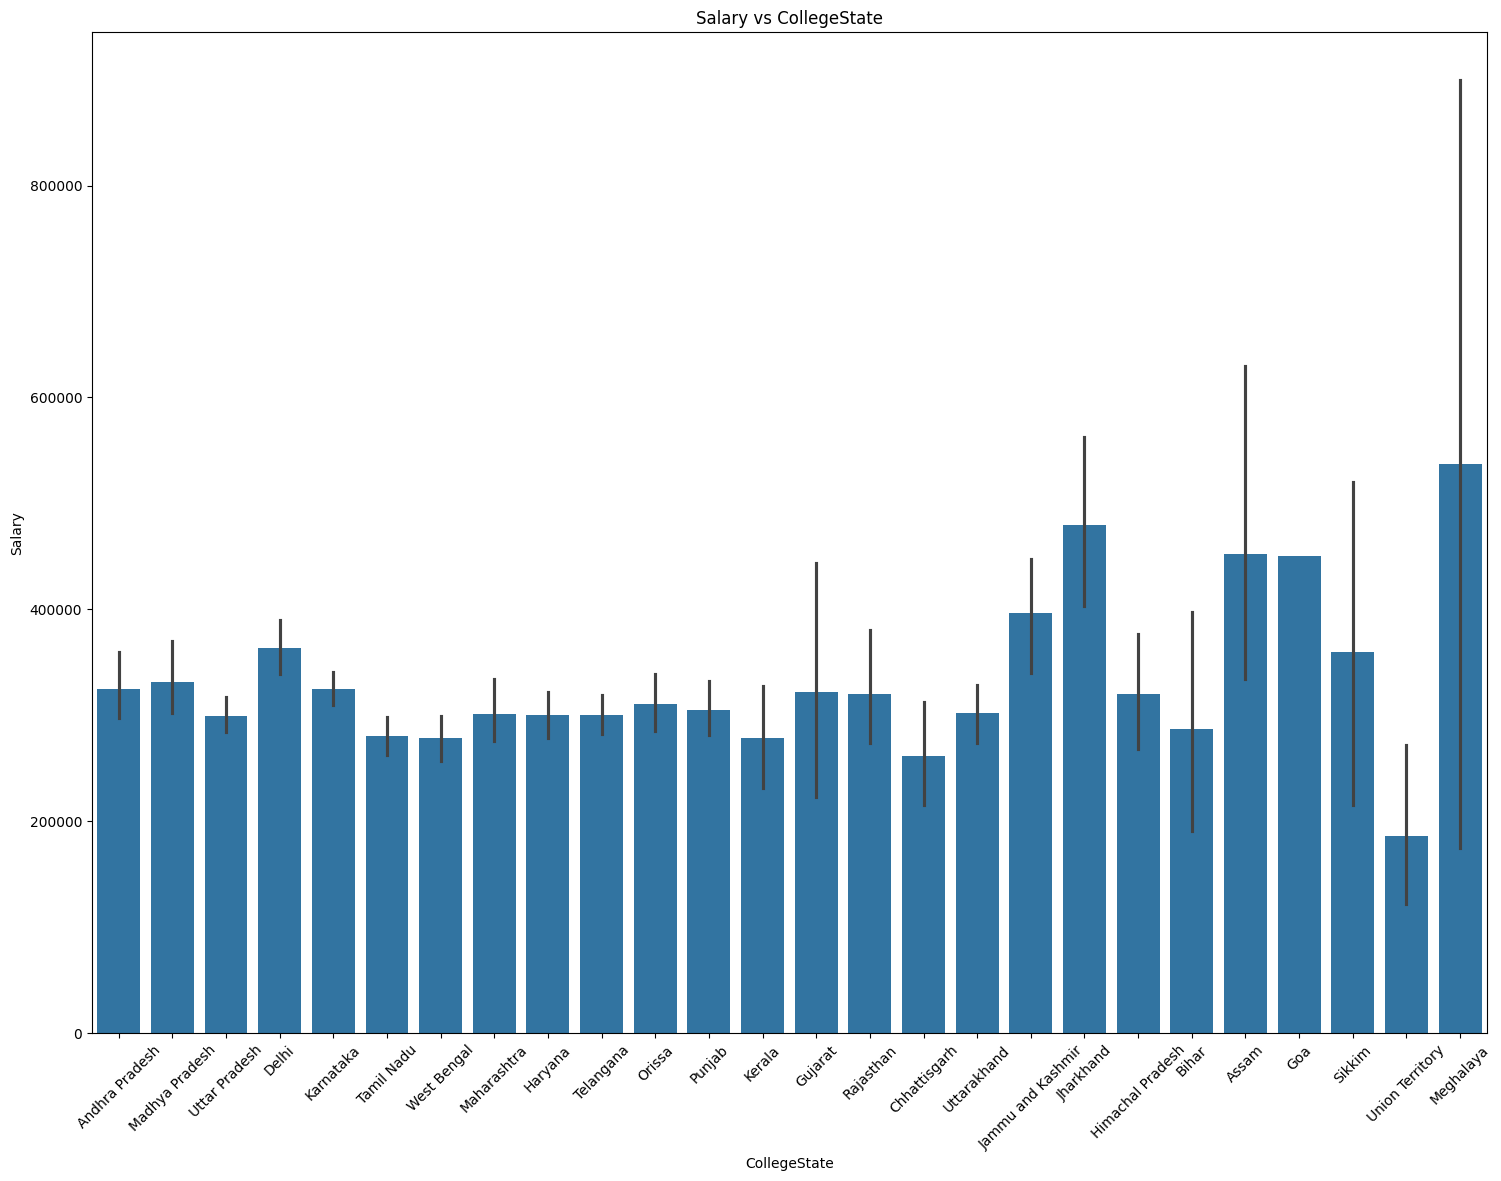

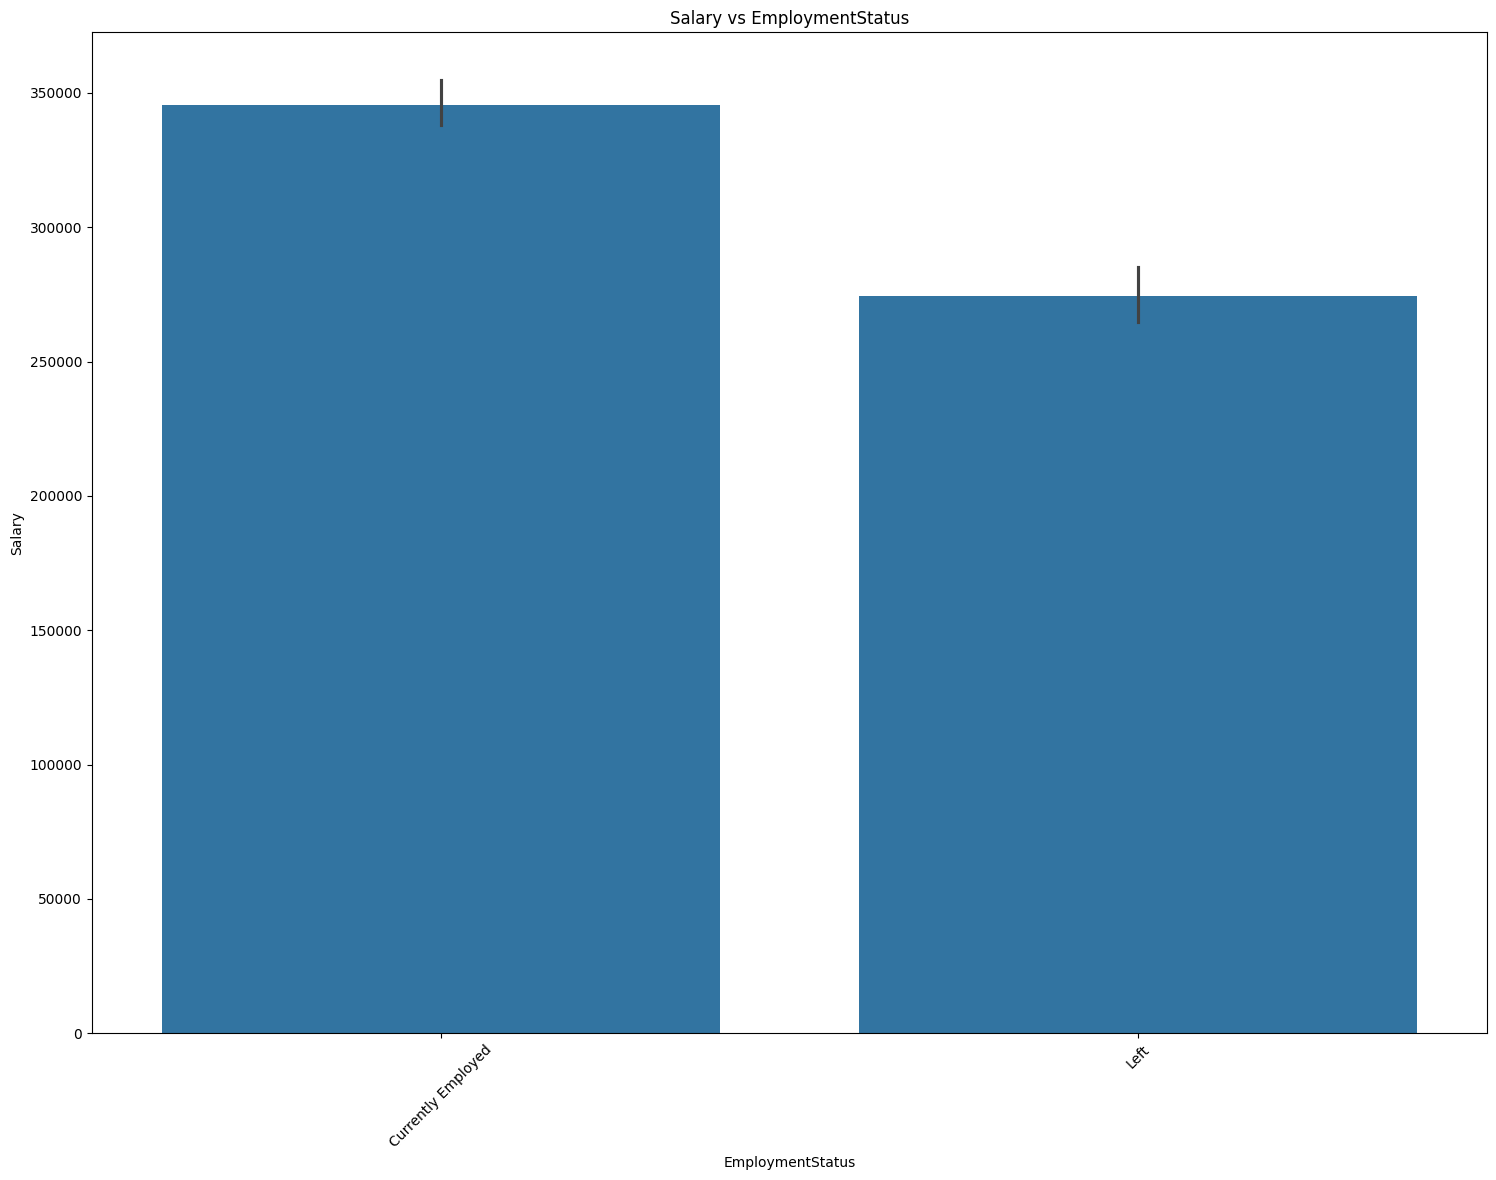

In [19]:
# Plot salary vs each categorical column
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(18, 13))
    sns.barplot(x=df[col], y=df['Salary'])
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.xticks(rotation=45)
    plt.show()

#### Salary vs each numerical column

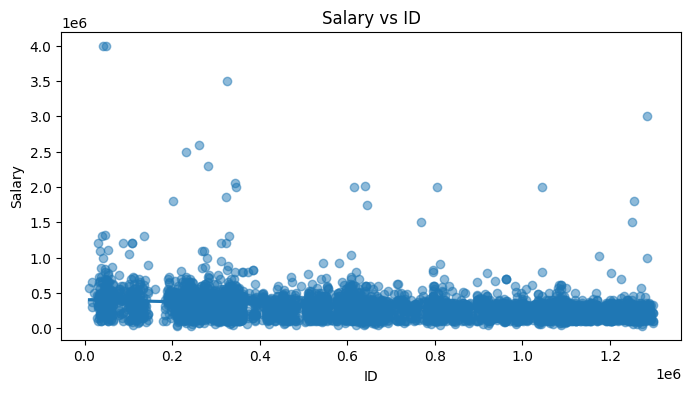

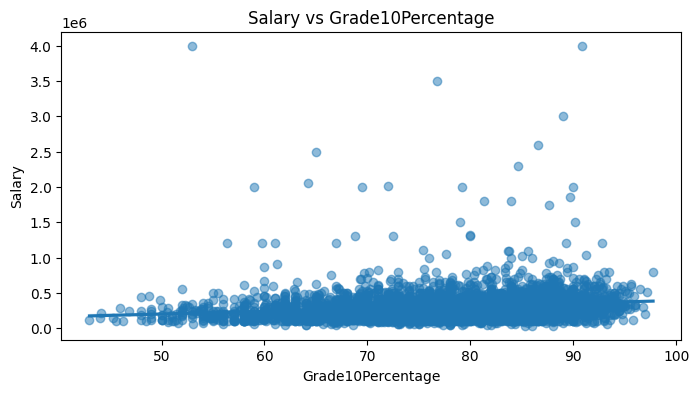

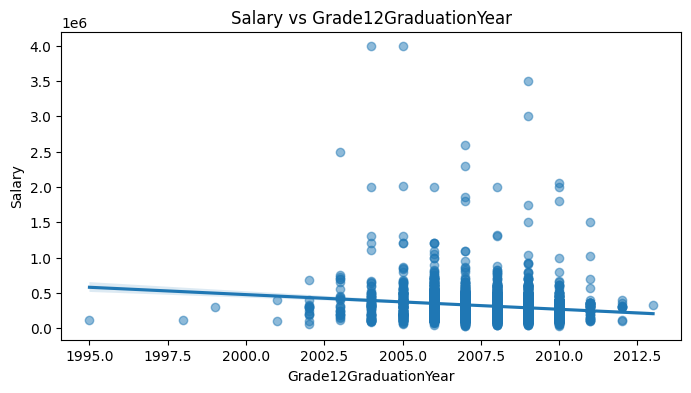

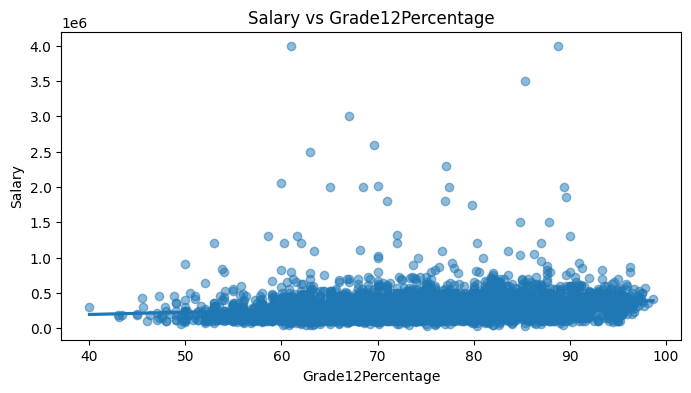

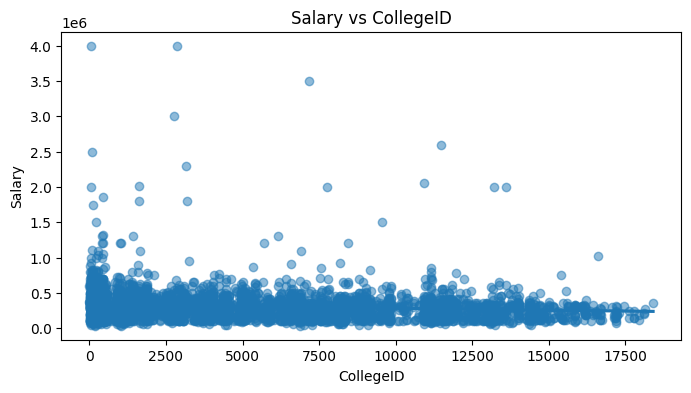

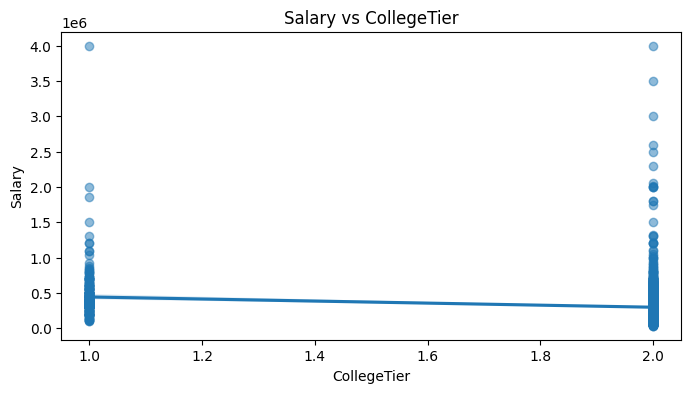

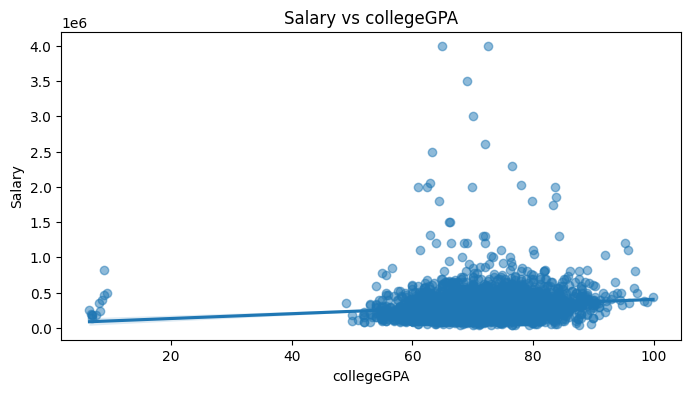

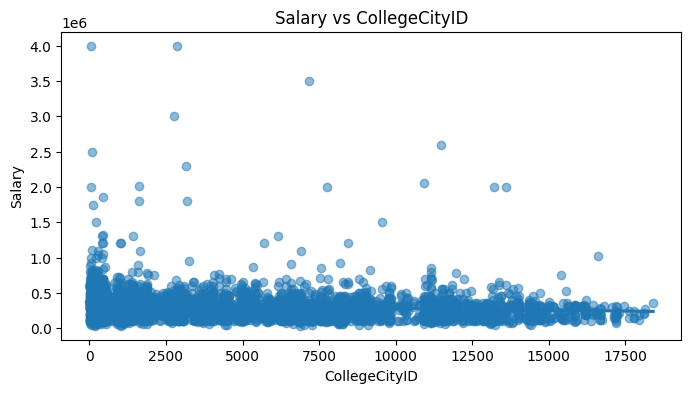

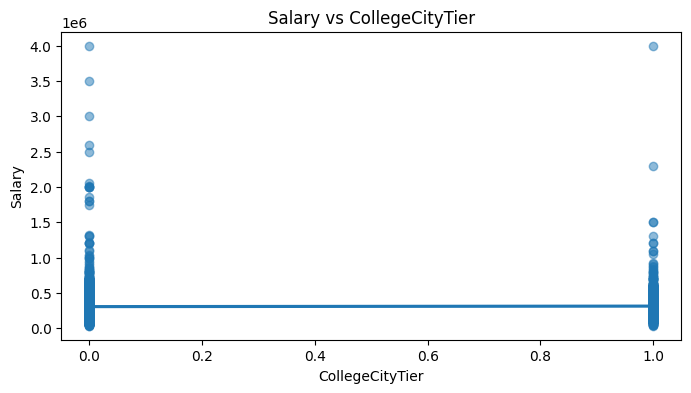

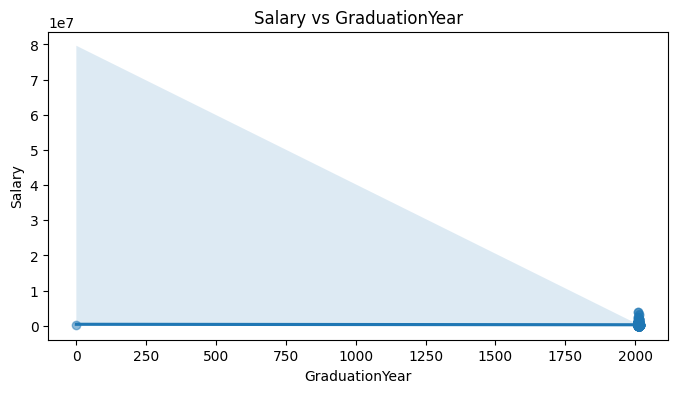

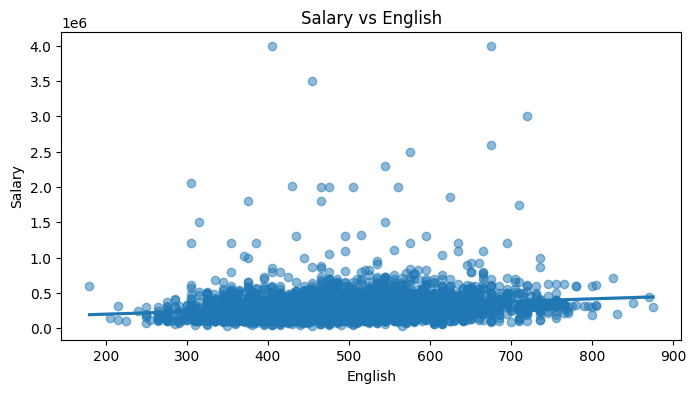

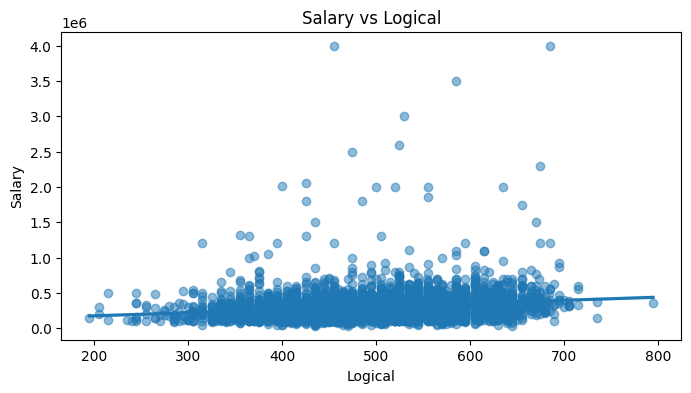

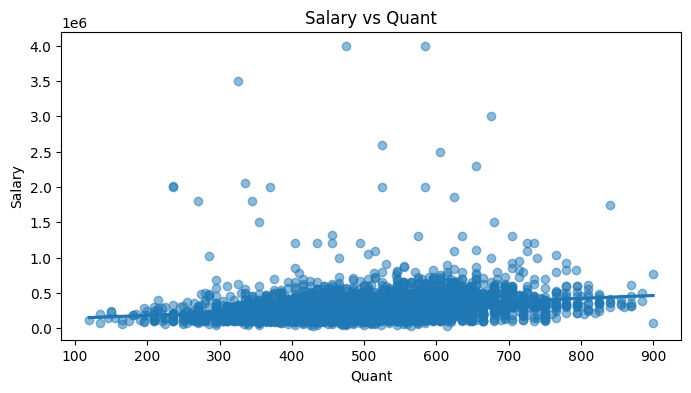

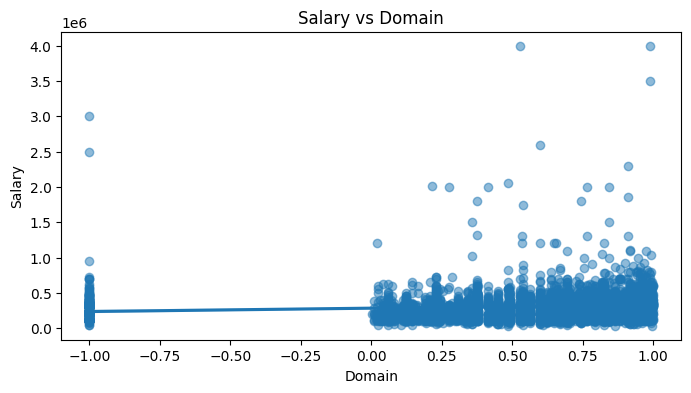

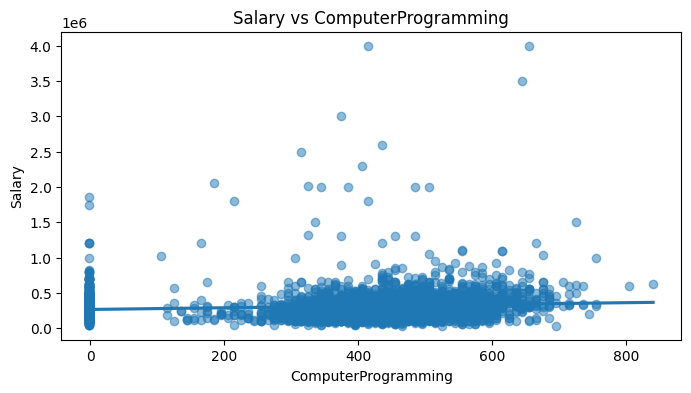

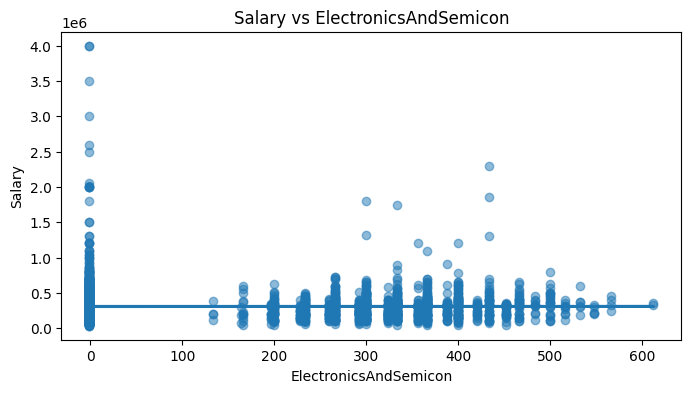

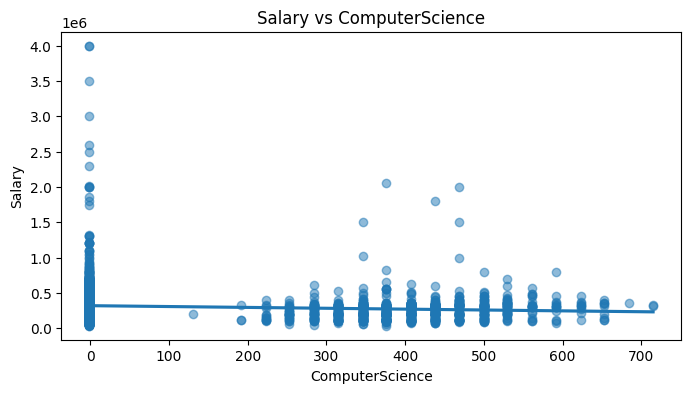

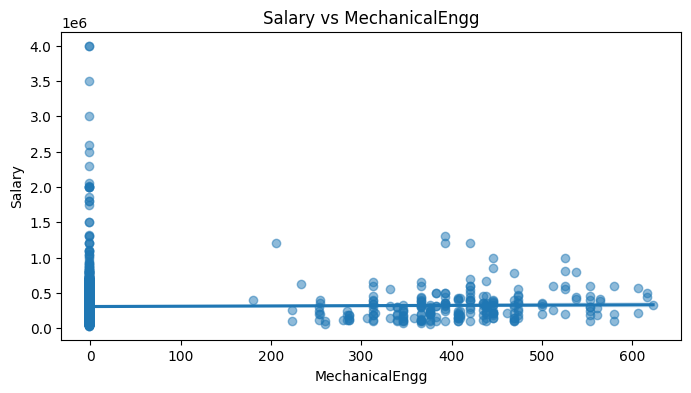

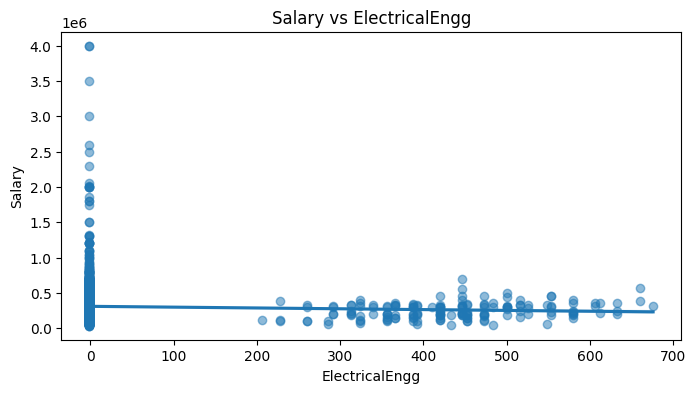

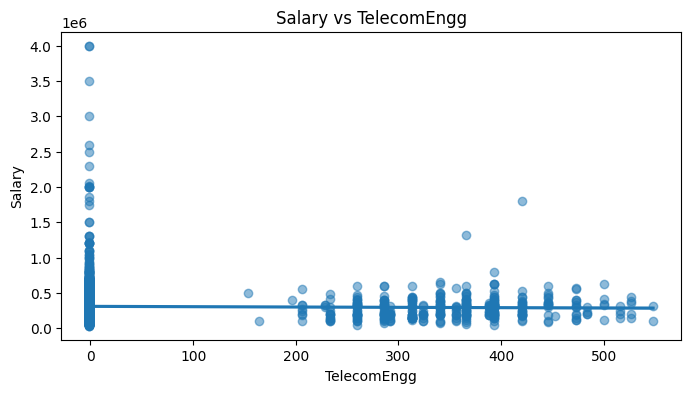

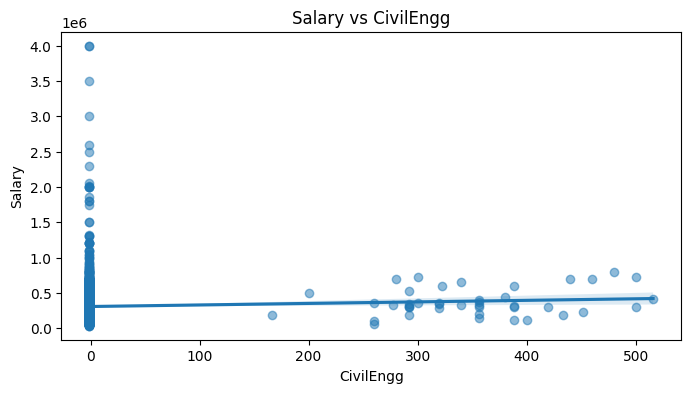

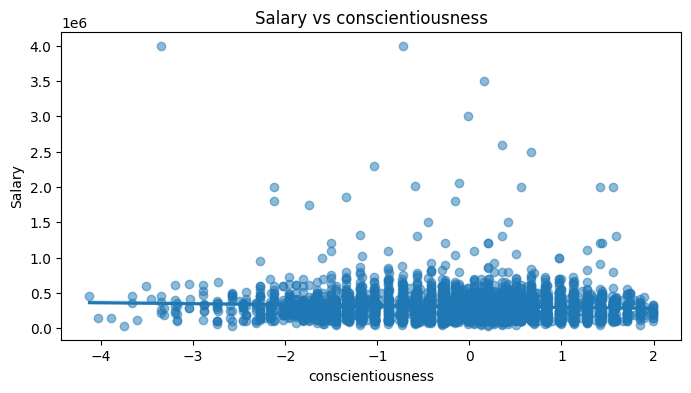

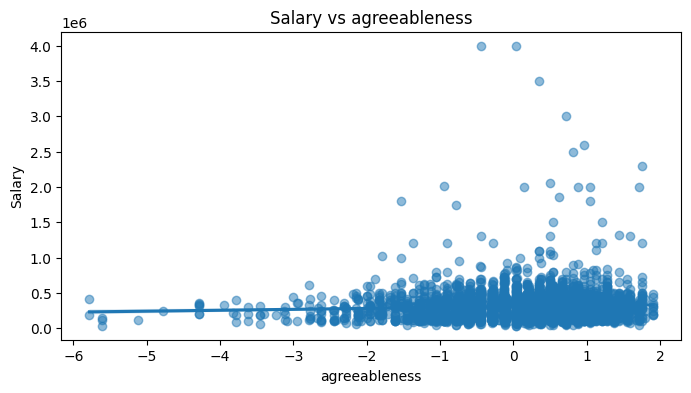

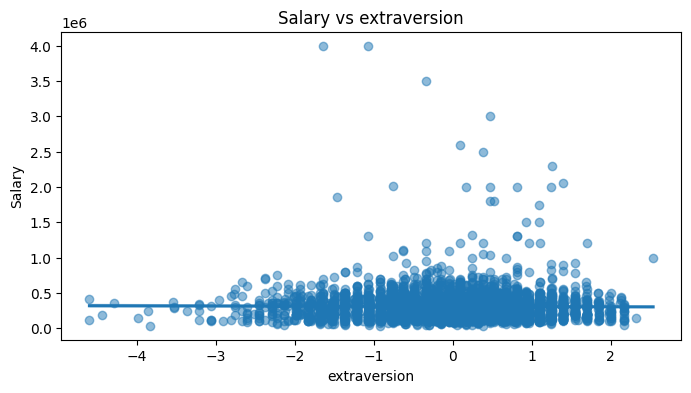

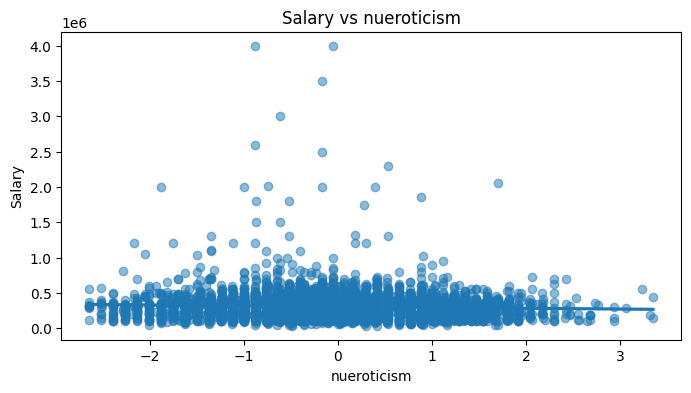

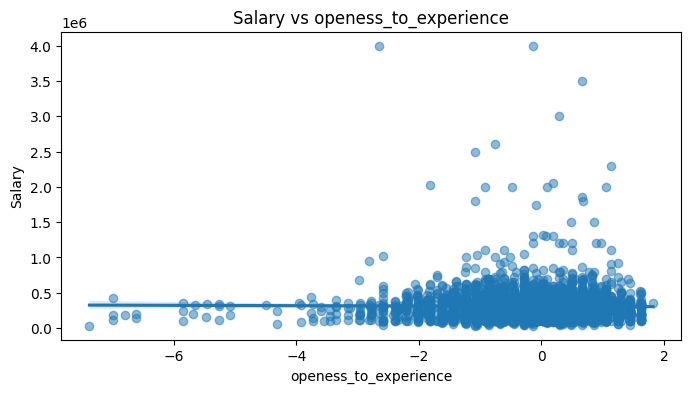

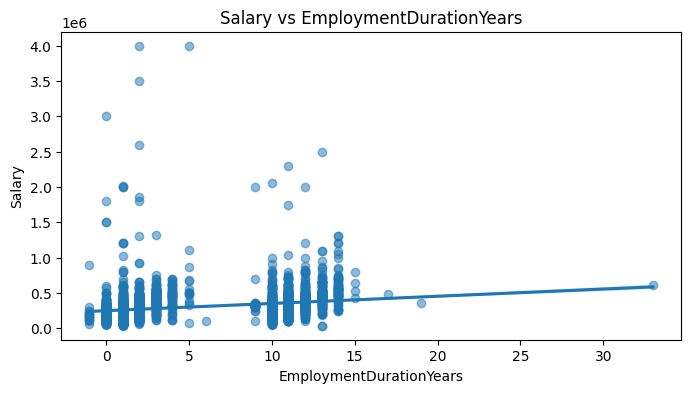

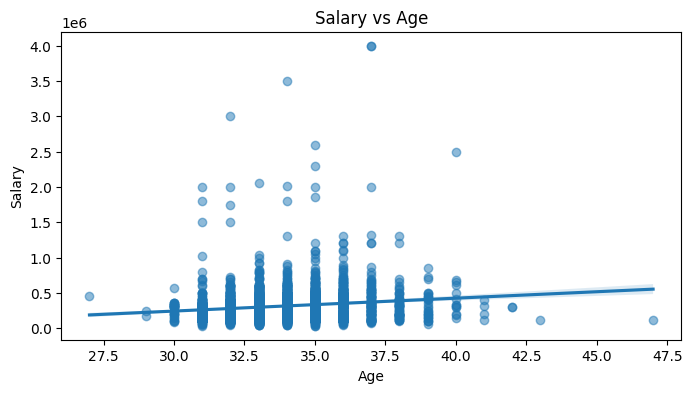

In [20]:
# Plot salary vs each numerical column
numerical_columns = df.select_dtypes(include='number').columns.drop('Salary')

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.regplot(x=df[col], y=df['Salary'], scatter_kws={'alpha':0.5})
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()

In [21]:
# Calculate correlation between salary and other numerical columns
correlation_with_salary = df[numerical_columns].corrwith(df['Salary'])
print(correlation_with_salary)

ID                        -0.247294
Grade10Percentage          0.177373
Grade12GraduationYear     -0.161383
Grade12Percentage          0.170254
CollegeID                 -0.118690
CollegeTier               -0.179332
collegeGPA                 0.130103
CollegeCityID             -0.118690
CollegeCityTier            0.015384
GraduationYear            -0.010053
English                    0.178219
Logical                    0.179275
Quant                      0.230627
Domain                     0.104656
ComputerProgramming        0.115665
ElectronicsAndSemicon      0.000665
ComputerScience           -0.100720
MechanicalEngg             0.018475
ElectricalEngg            -0.047598
TelecomEngg               -0.022691
CivilEngg                  0.037639
conscientiousness         -0.064148
agreeableness              0.057423
extraversion              -0.010213
nueroticism               -0.054685
openess_to_experience     -0.011312
EmploymentDurationYears    0.241118
Age                        0

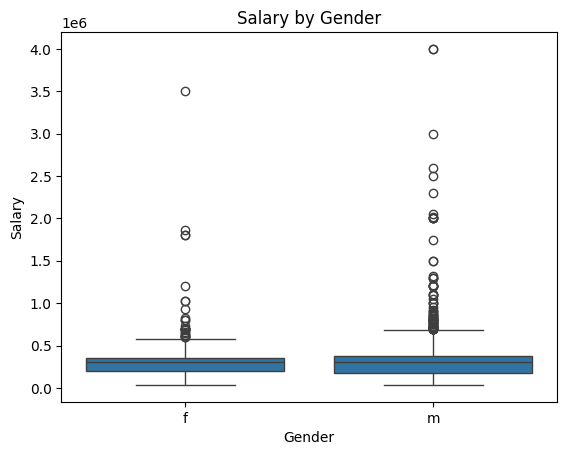

In [22]:
# Salary vs Gender
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.show()

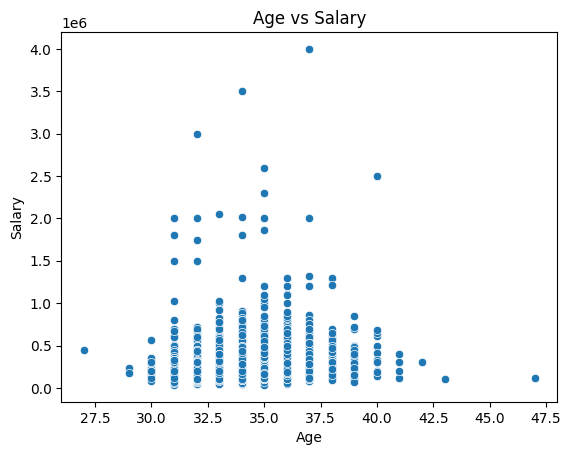

In [23]:
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

### Research Questions
A. Salary Validation Claim from Times of India Article
Test the claim: "Fresh graduates in Computer Science can earn up to 2.5-3 lakhs."

In [24]:
# Filter data for Computer Science and fresh graduates
cs_graduates = df[(df['Specialization'] == 'computer science') & (df['Salary'].notnull())]

# Test if the average salary falls between 2.5 to 3 lakhs
print("Average Salary of CS Graduates:", cs_graduates['Salary'].mean())

Average Salary of CS Graduates: 290000.0


The salary validation claim is true, since the avarage salary of computer sciennce graduates based on this data is 2.9 lakhs

In [25]:
import scipy.stats as stats
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Display the contingency table
print(contingency_table)

Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      2   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     7   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                                               5                       0   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                           9                    0                     1   
m                           6                    

In [26]:
# Perform Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")

Chi2 Stat: 104.46891913608455
P-Value: 1.2453868176976918e-06
Degrees of Freedom: 45


Since the p_value < 0.05, Gender and Specialization are dependent. There is a statistically significant association between the two variables. 